<a href="https://colab.research.google.com/github/yash-agarwl/Face-Mask-Detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1. Problem Definition*

  Objective: Detect whether people in images are wearing face masks or not.
  
  Use Case: Face mask detection has become essential in maintaining health protocols, especially during pandemics. The goal is to use machine learning to classify images into categories (with mask/without mask), which could be applied in real-time monitoring systems.

  

2. Why this Problem

  Relevance: Automated face mask detection systems support public health by enforcing mask policies in real-time. Such systems reduce manual checks and help maintain safety in public spaces, making them valuable in workplaces, transport systems, and events.

  Challenge: This problem is technically challenging due to factors like occlusions, variations in lighting, different types of masks, and real-time detection needs.



# New Section

*3. Your Approach*

  Data Handling: The notebook begins with steps to download the dataset from Kaggle, followed by extracting it for further processing.

  Modeling: The approach includes image preprocessing like converting it to numeric arrays, resizing them, setting up a deep learning model using Covolutional Neural Network (CNN) for image classification, and training on labeled data.

  Evaluation: The evaluation techniques such as accuracy, loss, validation accuracy, or validation loss are used to measure the model’s effectiveness in detecting face masks.
  
  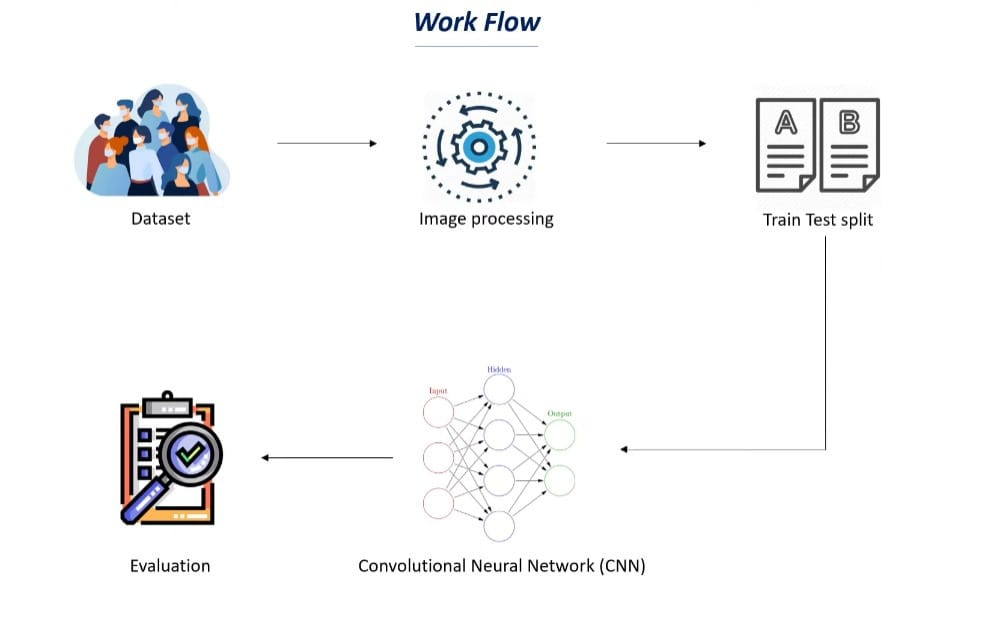

*4. Code*

  Dataset Access: Kaggle API is used for dataset downloading.

  Preprocessing: Code for handling images, including resizing, normalization, and data augmentation, is implemented.

  Model Training and Evaluation: CNN model construction, compiling, and training processes, with steps to validate and test the model’s performance, are provided here.


In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 71.0MB/s]
100% 163M/163M [00:01<00:00, 90.0MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1209.jpg', 'with_mask_2099.jpg', 'with_mask_1539.jpg', 'with_mask_1105.jpg', 'with_mask_2282.jpg']
['with_mask_3467.jpg', 'with_mask_1132.jpg', 'with_mask_495.jpg', 'with_mask_108.jpg', 'with_mask_1954.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3045.jpg', 'without_mask_2225.jpg', 'without_mask_3274.jpg', 'without_mask_3581.jpg', 'without_mask_2577.jpg']
['without_mask_1551.jpg', 'without_mask_244.jpg', 'without_mask_1804.jpg', 'without_mask_2241.jpg', 'without_mask_2685.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

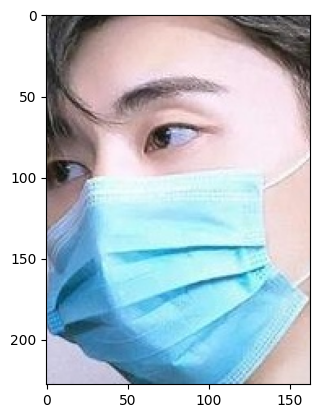

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

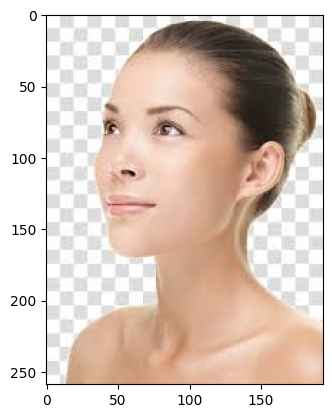

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 42,  49,  41],
        [ 44,  51,  43],
        [ 51,  58,  50],
        ...,
        [ 50,  36,  40],
        [ 52,  37,  40],
        [ 53,  37,  40]],

       [[ 42,  49,  41],
        [ 44,  51,  43],
        [ 50,  57,  49],
        ...,
        [ 47,  33,  37],
        [ 49,  34,  37],
        [ 49,  34,  37]],

       [[ 42,  49,  41],
        [ 43,  50,  42],
        [ 47,  54,  47],
        ...,
        [ 40,  28,  33],
        [ 41,  28,  32],
        [ 41,  28,  32]],

       ...,

       [[253, 250, 246],
        [254, 250, 245],
        [255, 249, 244],
        ...,
        [218, 193,  87],
        [218, 193,  87],
        [218, 193,  87]],

       [[249, 245, 242],
        [250, 246, 243],
        [252, 249, 245],
        ...,
        [219, 194,  89],
        [220, 194,  89],
        [220, 194,  89]],

       [[247, 243, 241],
        [248, 245, 242],
        [251, 249, 245],
        ...,
        [220, 194,  89],
        [221, 194,  89],
        [221, 194,  89]]], dtype=uint8)
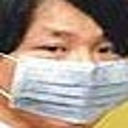

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[229, 233, 234],
        [221, 225, 226],
        [212, 216, 217],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [246, 246, 246]],

       [[228, 232, 233],
        [220, 224, 225],
        [211, 215, 216],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [245, 245, 245]],

       [[227, 231, 232],
        [219, 223, 224],
        [210, 214, 215],
        ...,
        [245, 245, 245],
        [244, 244, 244],
        [244, 244, 244]]], dtype=uint8)
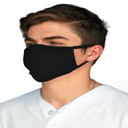

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.89803922, 0.91372549, 0.91764706],
        [0.86666667, 0.88235294, 0.88627451],
        [0.83137255, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - acc: 0.5894 - loss: 0.8381 - val_acc: 0.8843 - val_loss: 0.2720
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8691 - loss: 0.3302 - val_acc: 0.8893 - val_loss: 0.2667
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9035 - loss: 0.2594 - val_acc: 0.9058 - val_loss: 0.2391
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9117 - loss: 0.2317 - val_acc: 0.9074 - val_loss: 0.2153
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9304 - loss: 0.1802 - val_acc: 0.9074 - val_loss: 0.2416


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8959 - loss: 0.2608
Test Accuracy = 0.8927862048149109


5. Required Plots

  Training vs. Validation Loss and Accuracy Curves: These plots would demonstrate how the model’s performance improves over epochs.

  Sample Predictions: A few images with model predictions displayed would help showcase the model’s application.

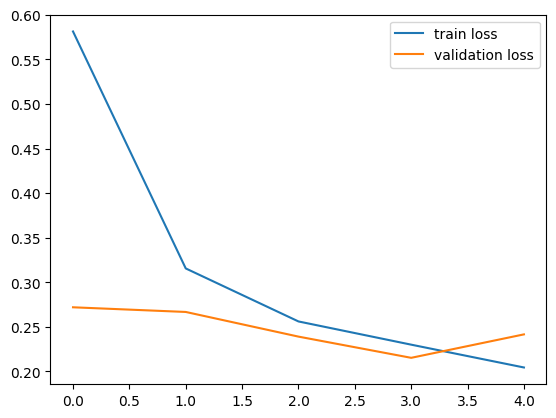

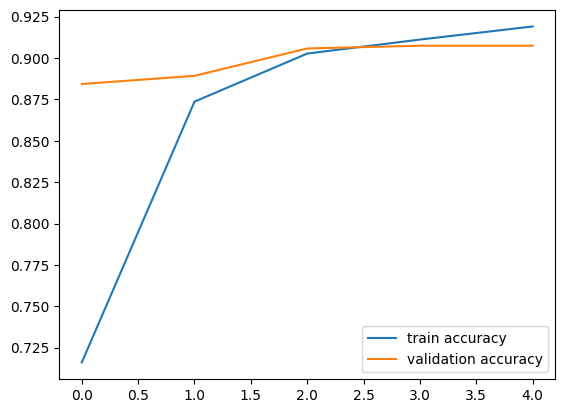

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/masked.png


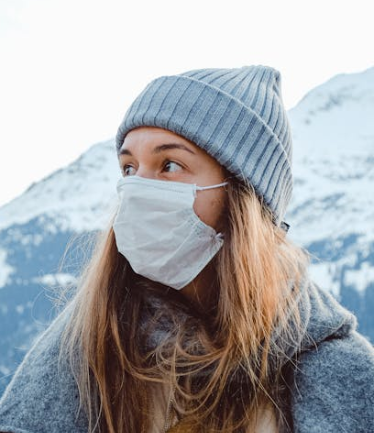

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.15492012 0.8631092 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/unmasked.png


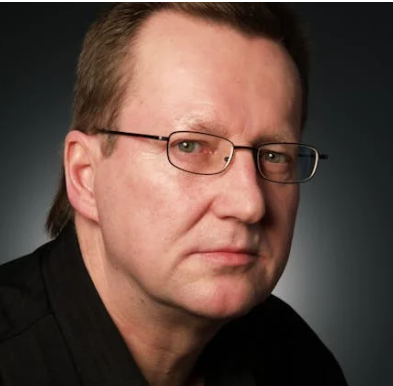

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.5031873  0.49454325]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

6. Detailed Analysis of Mask Detection Model Code
    1. Code Purpose and Objective:
    
    The code’s primary objective is to detect whether a person is wearing a mask in an image. This involves reading an input image, resizing and scaling it, preparing it for a model, making a prediction, and displaying the result.
    This type of project is typically part of a broader application for mask compliance, useful in health and safety contexts.
    2. Input Handling:

    The code begins by prompting the user to provide the path of an image file. The image is then loaded using OpenCV (cv2.imread(input_image_path)). This allows the user to test the model on any new images.
    The OpenCV library is used to handle image processing, and the cv2_imshow function is employed to visualize the input image, which is useful for verifying that the correct image is loaded.
    3. Image Preprocessing:

    Resizing: The input image is resized to 128x128 pixels using cv2.resize(input_image, (128,128)). This ensures that all input images are of consistent size for the model, as many models require a fixed input size.
    Scaling: The resized image is normalized by dividing by 255 (input_image_scaled = input_image_resized / 255). This scales the pixel values between 0 and 1, which is a common preprocessing step to enhance model performance.
    Reshaping: The image is reshaped to the format [1, 128, 128, 3] to match the input shape expected by the model, where:
    1 is the batch size (for a single image),
    128x128 is the spatial dimension, and
    3 represents the RGB channels.
    4. Model Prediction:

    The model predicts on the reshaped image using model.predict(input_image_reshaped). This returns a prediction vector, indicating the probabilities or confidence levels for each class (mask or no mask).
    The prediction result is processed with np.argmax(input_prediction), which retrieves the class with the highest confidence score. Here, an output of 1 might indicate "wearing a mask," and 0 indicates "not wearing a mask."
    5. Output Interpretation and Display:

    Based on the prediction label (input_pred_label), the code prints a statement to inform the user if the person in the image is wearing a mask or not. This feedback is essential for the end user.
    A conditional statement checks if the label is 1 or 0 and displays the corresponding message.
    6. Calculating Model Performance Metrics:

    Evaluating the model’s accuracy, loss, validation accuracy, and validation loss, predictions are made on a dataset with known labels.

    Accuracy: The ratio of correct predictions (both mask and no mask) to the total predictions.

    Loss: Loss is a measure of the difference between the model’s predictions and the actual target values (ground truth). It quantifies the error made by the model during training.

    Validation Accuracy: Validation accuracy is the accuracy of the model measured on the validation set, a subset of data that is not used for training. It indicates how well the model generalizes to unseen data.

    Validation Loss: Validation loss is the loss measured on the validation set. Like validation accuracy, it provides insight into the model's generalization ability on data it hasn't seen during training.

  7. Limitations and Potential Enhancements:

    Single-Image Prediction: The code currently supports predicting on only one image at a time. To improve, we could batch-process multiple images.

    Data Augmentation: If the model’s performance is suboptimal,we could consider augmenting the dataset to improve generalizability.

    Error Handling: The code could include error handling to manage invalid image paths or incompatible images more gracefully.

    Performance Metrics: Running a comprehensive evaluation on a test set provides more insight than single-image prediction, making it possible to tune the model and evaluate performance in real-world scenarios.



  
8. Instructions to Execute the Code

  Dependencies: The following libraries are needed to be installed in Google Colab as shown:
  !pip install kaggle

  Kaggle API: Placing a kaggle.json file in the root directory to access the Kaggle dataset. The file contains the Kaggle API credentials, and permissions that must be set appropriately as shown in the code.

  Other Libraries: Using TensorFlow, Keras, or OpenCV, are installed
  !pip install tensorflow opencv-python-headless

  
9. Summary:

  Overall, the code offers a straightforward approach to deploying a mask detection model on individual images. Its structure is well-suited for small-scale or demo applications and could be easily expanded for larger applications by including batch processing, improved error handling, and model evaluation over multiple metrics.